In [1]:
import pandas as pd
import datetime as dt

# Define the start and end dates
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2021, 12, 28)

# Load the CSV file and set 'Date' as the index
data = pd.read_csv('Tatacoffee13_21.csv', parse_dates=['Date'], index_col='Date')

# Filter the data based on the index
stk_data = data[(data.index >= start) & (data.index <= end)]

# Display the filtered data
print(stk_data)

              Open    High     Low   Close
Date                                      
2021-07-01  188.60  189.00  183.00  184.55
2021-07-02  183.05  187.50  182.15  186.40
2021-07-05  187.85  198.35  187.85  192.45
2021-07-06  193.80  194.80  187.35  188.80
2021-07-07  187.80  193.95  185.40  192.85
...            ...     ...     ...     ...
2021-12-22  202.90  207.80  201.35  205.00
2021-12-23  206.00  206.85  202.05  202.95
2021-12-24  203.90  203.90  199.35  201.00
2021-12-27  200.00  222.00  196.00  218.35
2021-12-28  219.65  220.45  211.55  212.35

[123 rows x 4 columns]


In [2]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,188.60,189.00,183.00,184.55
2021-07-02,183.05,187.50,182.15,186.40
2021-07-05,187.85,198.35,187.85,192.45
2021-07-06,193.80,194.80,187.35,188.80
2021-07-07,187.80,193.95,185.40,192.85
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [3]:
stk_data.index

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14',
               ...
               '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-27', '2021-12-28'],
              dtype='datetime64[ns]', name='Date', length=123, freq=None)

In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (123, 1)


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:

"""from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(stk_data), len(stk_data)-1)
print(y_pred)
from stockFunctions import rmsemape
rmsemape(stkk,predicted_stock_price_test_oriP["Open"])"""

'from statsmodels.tsa.arima.model import ARIMA\nmodel = ARIMA(data1, order=(1,1,1))#Autoregressive Integrated Moving Average (ARIMA)\nmodel_fit = model.fit()\n# make prediction\ny_pred= model_fit.predict(len(stk_data), len(stk_data)-1)\nprint(y_pred)\nfrom stockFunctions import rmsemape\nrmsemape(stkk,predicted_stock_price_test_oriP["Open"])'

In [32]:

orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    model = SARIMAX(data1, order=i, seasonal_order=(0,0,0,6))
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    
    

RMSE-Testset: 0.5307809830189196
maPe-Testset: 0.991869918699187
RMSE-Testset: 0.2953374053991822
maPe-Testset: 5358861642651.006
RMSE-Testset: 0.10406422444187441
maPe-Testset: 4632241811199.045
RMSE-Testset: 0.10250036073595618
maPe-Testset: 5876969416959.786


In [33]:
len(y_pred)

123

In [34]:
len(data1)

123

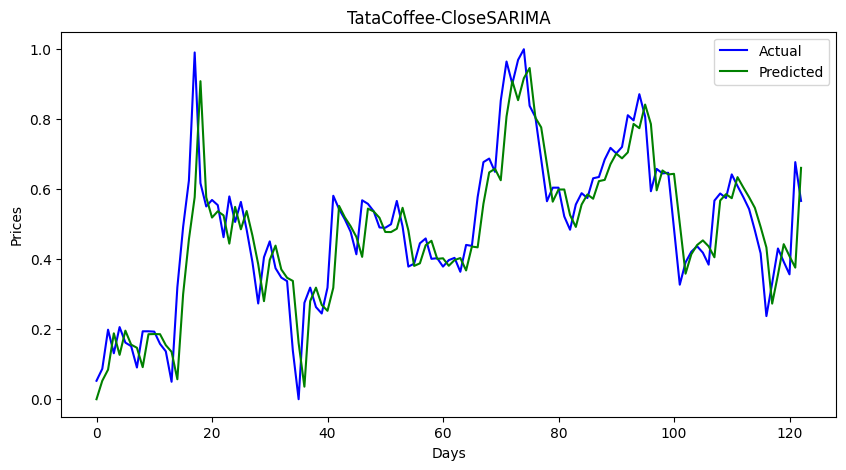

In [35]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","TataCoffee-CloseSARIMA","Days","Prices")

In [36]:
len(data1)

123

In [22]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [23]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

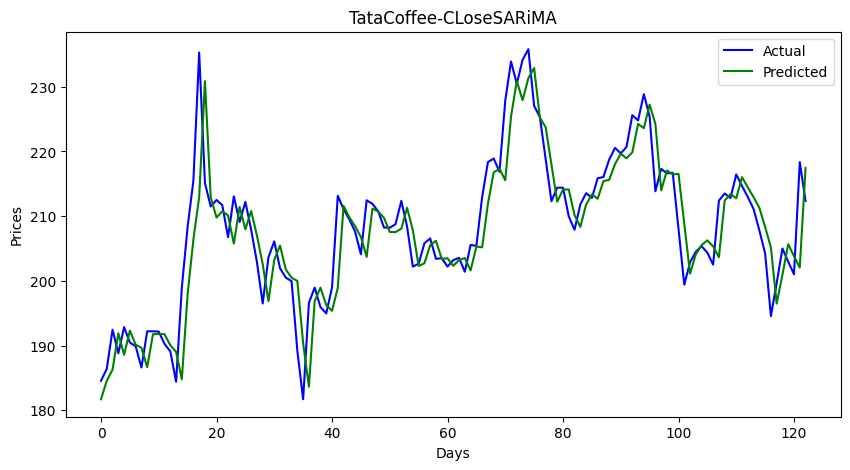

In [25]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-CLoseSARiMA","Days","Prices")

In [26]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 5.545269515815233
maPe-Testset: 0.01856383901616913


In [27]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [28]:
forecast

array([0.56282223, 0.55965009, 0.55694599, 0.5546409 ])

In [29]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [30]:
forecast_stock_price_test_oriF

,Closefore
0,212.148683
1,211.97707
2,211.830778
3,211.706072


In [31]:
forecast_stock_price_test_oriF.to_csv("CloseSARIMA.csv",index=False)